<a href="https://colab.research.google.com/github/Imad-codes/ifood-marketing-analysis/blob/main/Ifood_Marketing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Installing the modules:
!pip install numpy
!pip install pandas

In [8]:
# Importing the modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [9]:
#checking all function in module available
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

In [10]:
#description and of its fuction
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'MergeHow' = 'inner', on: 'IndexLabel | AnyArrayLike | None' = None, left_on: 'IndexLabel | AnyArrayLike | None' = None, right_on: 'IndexLabel | AnyArrayLike | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool | None' = None, indicator: 'str | bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.

    A named Series object is treated as a DataFrame with a single named column.

    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.

  

In [11]:
!pip install gdown -q

In [18]:
import gdown

file_id = '1vc--LvteCMrcHD4shz-X8K8Y7lrKldtW'
file_path = 'ifood_df.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=True)

print(f'File downloaded to {file_path}')

File downloaded to ifood_df.csv


In [21]:
df = pd.read_csv(
    file_path,
    skipfooter=2,
    engine='python' # Specify python engine due to skipfooter
)

In [22]:
# ==========================
# Mapping Education & Marital pakai kolom yang benar
# ==========================

def map_education(row):
    if row['education_Basic'] == 1: return "Basic"
    elif row['education_Graduation'] == 1: return "Graduation"
    elif row['education_Master'] == 1: return "Master"
    elif row['education_PhD'] == 1: return "PhD"
    elif row['education_2n Cycle'] == 1: return "2n Cycle"
    else: return "Other"

def map_marital(row):
    if row['marital_Single'] == 1: return "Single"
    elif row['marital_Married'] == 1: return "Married"
    elif row['marital_Together'] == 1: return "Together"
    elif row['marital_Divorced'] == 1: return "Divorced"
    elif row['marital_Widow'] == 1: return "Widow"
    else: return "Other"

df['Education'] = df.apply(map_education, axis=1)
df['Marital'] = df.apply(map_marital, axis=1)

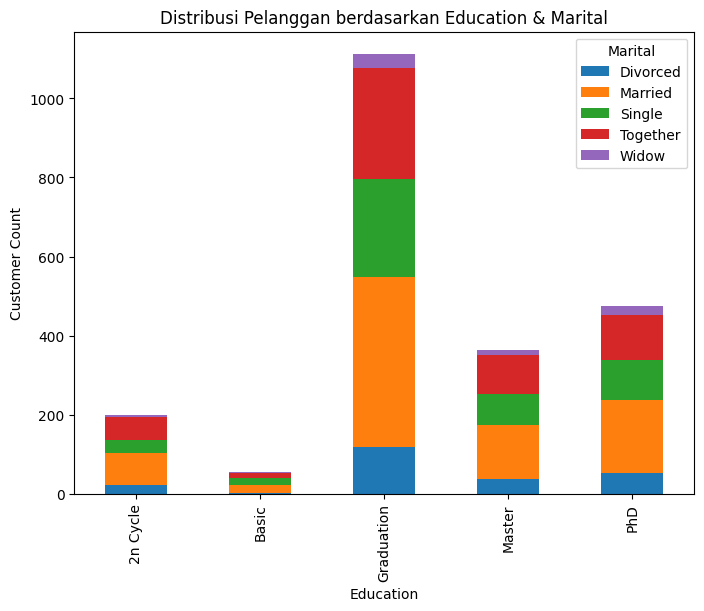

In [23]:
# ==========================
# 1. Demografi
# ==========================
demography = df.groupby(['Education','Marital']).size().reset_index(name='CustomerCount')
pivot_demo = demography.pivot(index='Education', columns='Marital', values='CustomerCount').fillna(0)
pivot_demo.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Distribusi Pelanggan berdasarkan Education & Marital")
plt.ylabel("Customer Count")
plt.show()

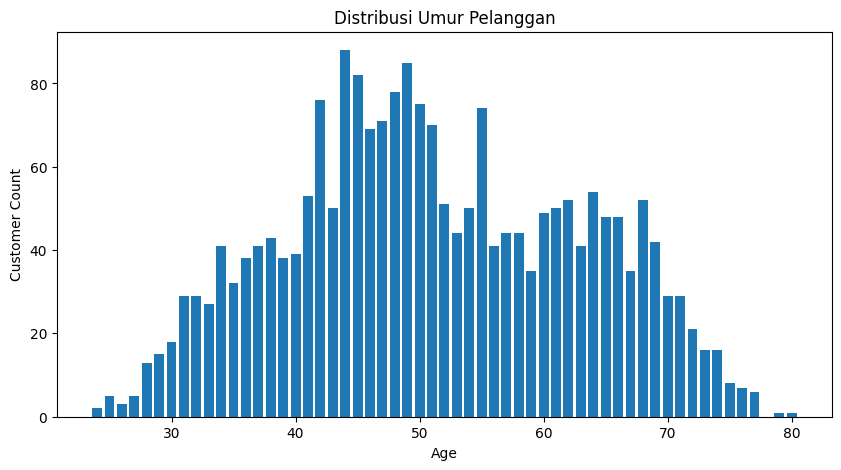

In [24]:
# ==========================
# 2. Distribusi Umur (pakai kolom Age langsung)
# ==========================
age_dist = df.groupby('Age').size().reset_index(name='CustomerCount')
plt.figure(figsize=(10,5))
plt.bar(age_dist['Age'], age_dist['CustomerCount'])
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.show()

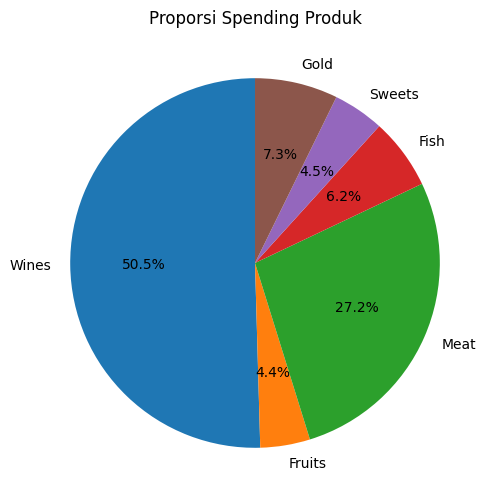

In [25]:
# ==========================
# 3. Spending Produk
# ==========================
product_spending = {
    "Wines": df['MntWines'].sum(),
    "Fruits": df['MntFruits'].sum(),
    "Meat": df['MntMeatProducts'].sum(),
    "Fish": df['MntFishProducts'].sum(),
    "Sweets": df['MntSweetProducts'].sum(),
    "Gold": df['MntGoldProds'].sum()
}
plt.figure(figsize=(8,6))
plt.pie(product_spending.values(), labels=product_spending.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Proporsi Spending Produk")
plt.show()

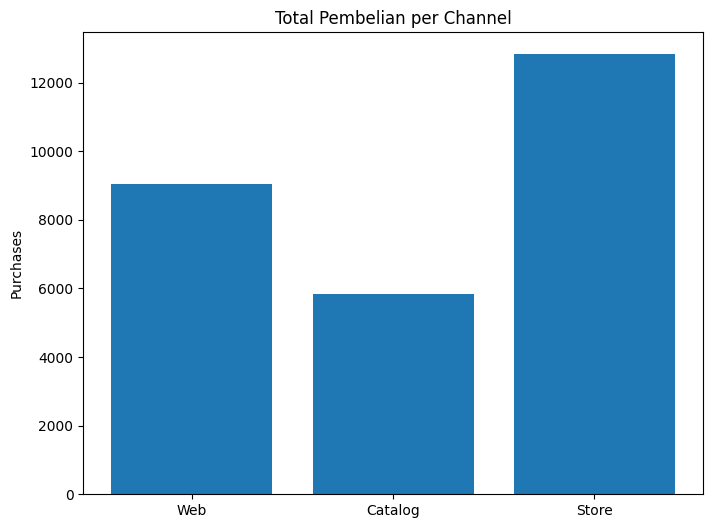

In [26]:
# ==========================
# 4. Channel Pembelian
# ==========================
channel_spending = {
    "Web": df['NumWebPurchases'].sum(),
    "Catalog": df['NumCatalogPurchases'].sum(),
    "Store": df['NumStorePurchases'].sum()
}
plt.figure(figsize=(8,6))
plt.bar(channel_spending.keys(), channel_spending.values())
plt.title("Total Pembelian per Channel")
plt.ylabel("Purchases")
plt.show()

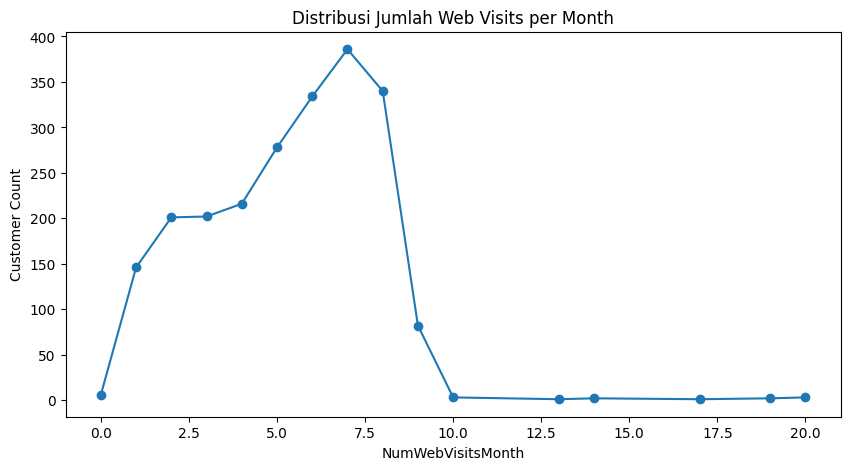

In [27]:
# ==========================
# 5. Aktivitas Website
# ==========================
web_visits = df.groupby('NumWebVisitsMonth').size().reset_index(name='CustomerCount')
plt.figure(figsize=(10,5))
plt.plot(web_visits['NumWebVisitsMonth'], web_visits['CustomerCount'], marker='o')
plt.title("Distribusi Jumlah Web Visits per Month")
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Customer Count")
plt.show()

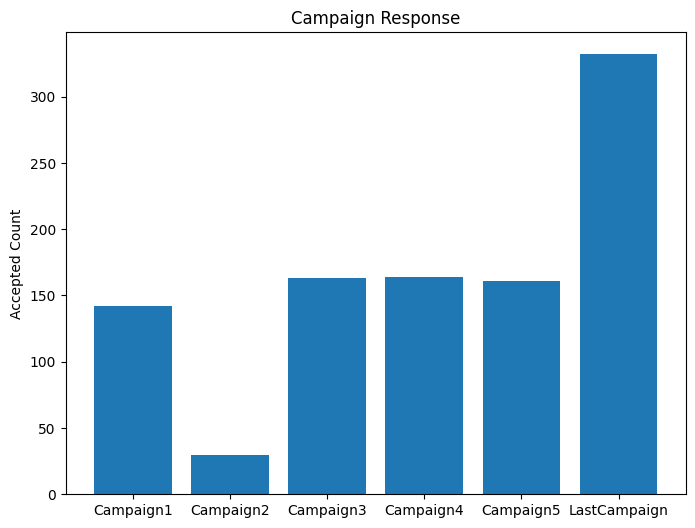

In [28]:
# ==========================
# 6. Campaign Response
# ==========================
campaign_response = {
    "Campaign1": df['AcceptedCmp1'].sum(),
    "Campaign2": df['AcceptedCmp2'].sum(),
    "Campaign3": df['AcceptedCmp3'].sum(),
    "Campaign4": df['AcceptedCmp4'].sum(),
    "Campaign5": df['AcceptedCmp5'].sum(),
    "LastCampaign": df['Response'].sum()
}
plt.figure(figsize=(8,6))
plt.bar(campaign_response.keys(), campaign_response.values())
plt.title("Campaign Response")
plt.ylabel("Accepted Count")
plt.show()

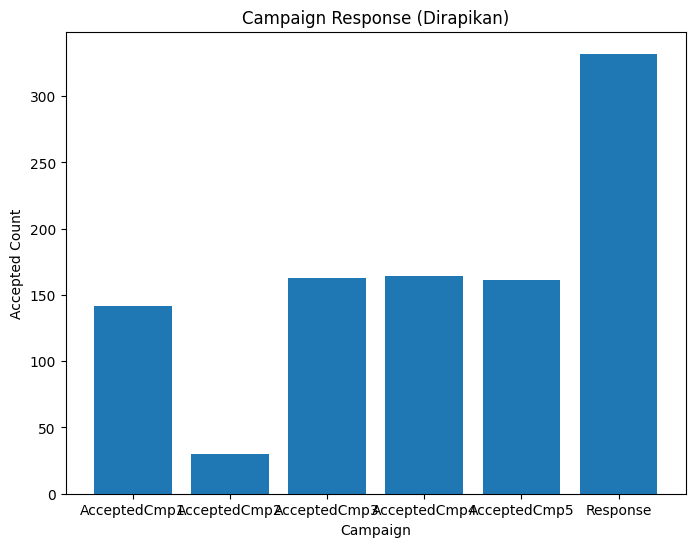

In [29]:
# ==========================
# 6. Campaign Response (Versi Dirapikan)
# ==========================

# Ambil hanya kolom campaign
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Unpivot/melt ke format long
campaign_df = df[campaign_cols].melt(var_name="Campaign", value_name="Accepted")

# Hitung jumlah accepted per campaign
campaign_summary = campaign_df.groupby("Campaign")['Accepted'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(8,6))
plt.bar(campaign_summary['Campaign'], campaign_summary['Accepted'])
plt.title("Campaign Response (Dirapikan)")
plt.xlabel("Campaign")
plt.ylabel("Accepted Count")
plt.show()